In [149]:
#Energy Price Prediction using Machine Learning Algorithms- Linear, SVM and Random Forest Regression

In [ ]:
# Module Alization (Import Numpy, Padas, Matplotlib, Seaborn Libraries)

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read Dataset for Analysis

In [148]:
df = pd.read_csv('energy_dataset.csv')

In [151]:
df

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17,NaN,6436,26118,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16,NaN,5856,24934,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8,NaN,5454,23515,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2,NaN,5151,22642,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9,NaN,4861,21785,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16564,2016-11-21 04:00:00+01:00,338.0,609.0,0.0,3439.0,1450.0,182.0,0.0,0.0,0.0,...,281.0,0.0,13810.0,25,NaN,13793,21463,21697.0,10.88,20.32
16565,2016-11-21 05:00:00+01:00,343.0,613.0,0.0,3451.0,1748.0,198.0,0.0,0.0,0.0,...,285.0,0.0,13656.0,16,NaN,13685,22266,22441.0,20.00,28.11
16566,2016-11-21 06:00:00+01:00,355.0,736.0,0.0,3817.0,2548.0,226.0,0.0,0.0,0.0,...,290.0,0.0,13841.0,7,NaN,13742,25171,25567.0,35.00,43.18
16567,2016-11-21 07:00:00+01:00,360.0,886.0,0.0,4268.0,3342.0,235.0,0.0,0.0,0.0,...,296.0,0.0,14016.0,4,NaN,13960,29517,29818.0,46.40,53.06


In [55]:
df.shape # Check size of dataset(rows and columns)

(16569, 29)

In [56]:
df.dtypes # Check dtypes of all columns

time                                            object
generation biomass                             float64
generation fossil brown coal/lignite           float64
generation fossil coal-derived gas             float64
generation fossil gas                          float64
generation fossil hard coal                    float64
generation fossil oil                          float64
generation fossil oil shale                    float64
generation fossil peat                         float64
generation geothermal                          float64
generation hydro pumped storage aggregated     float64
generation hydro pumped storage consumption    float64
generation hydro run-of-river and poundage     float64
generation hydro water reservoir               float64
generation marine                              float64
generation nuclear                             float64
generation other                               float64
generation other renewable                     float64
generation

In [57]:
df.info() #Abstract summary (information) about all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16569 entries, 0 to 16568
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         16569 non-null  object 
 1   generation biomass                           16552 non-null  float64
 2   generation fossil brown coal/lignite         16552 non-null  float64
 3   generation fossil coal-derived gas           16552 non-null  float64
 4   generation fossil gas                        16552 non-null  float64
 5   generation fossil hard coal                  16552 non-null  float64
 6   generation fossil oil                        16551 non-null  float64
 7   generation fossil oil shale                  16552 non-null  float64
 8   generation fossil peat                       16552 non-null  float64
 9   generation geothermal                        16552 non-null  float64
 10

In [58]:
df.describe().T # Descriptive summary of dataset (Works on Numerical Columns)

,count,mean,std,min,25%,50%,75%,max
generation biomass,16552.0,433.164149,91.221395,101.00,358.00,448.00,513.00,592.00
generation fossil brown coal/lignite,16552.0,431.282262,389.813397,0.00,0.00,448.00,865.00,997.00
generation fossil coal-derived gas,16552.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
generation fossil gas,16552.0,5022.886056,1728.186065,1518.00,3921.00,4597.00,5620.00,16250.00
generation fossil hard coal,16552.0,4453.370408,2168.005375,576.00,2401.75,4839.50,6194.00,8359.00
generation fossil oil,16551.0,310.129418,59.506841,87.00,271.00,306.00,354.00,449.00
generation fossil oil shale,16552.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
generation fossil peat,16552.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
generation geothermal,16552.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
generation hydro pumped storage aggregated,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
# finding the missing value
df.isna().sum()

time                                               0
generation biomass                                17
generation fossil brown coal/lignite              17
generation fossil coal-derived gas                17
generation fossil gas                             17
generation fossil hard coal                       17
generation fossil oil                             18
generation fossil oil shale                       17
generation fossil peat                            17
generation geothermal                             17
generation hydro pumped storage aggregated     16569
generation hydro pumped storage consumption       18
generation hydro run-of-river and poundage        18
generation hydro water reservoir                  17
generation marine                                 18
generation nuclear                                16
generation other                                  17
generation other renewable                        17
generation solar                              

In [ ]:
# From above output 2 columns have maximum missing values so drop that columns 

In [60]:
df.drop(columns=['forecast wind offshore eday ahead','generation hydro pumped storage aggregated'],inplace=True)

In [152]:
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17,NaN,6436,26118,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16,NaN,5856,24934,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8,NaN,5454,23515,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2,NaN,5151,22642,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9,NaN,4861,21785,20264.0,38.41,56.04


In [ ]:
 # Now check remaining columns who having some missing (null) values.

In [153]:
df.isna().sum()

time                                               0
generation biomass                                17
generation fossil brown coal/lignite              17
generation fossil coal-derived gas                17
generation fossil gas                             17
generation fossil hard coal                       17
generation fossil oil                             18
generation fossil oil shale                       17
generation fossil peat                            17
generation geothermal                             17
generation hydro pumped storage aggregated     16569
generation hydro pumped storage consumption       18
generation hydro run-of-river and poundage        18
generation hydro water reservoir                  17
generation marine                                 18
generation nuclear                                16
generation other                                  17
generation other renewable                        17
generation solar                              

In [ ]:
# These columns have some null values so drop it.

In [63]:
df.dropna(inplace=True)

In [64]:
df.isna().sum()

time                                           0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil coal-derived gas             0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation fossil oil shale                    0
generation fossil peat                         0
generation geothermal                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation marine                              0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind offshore                       0
generation wind onsh

In [ ]:
# Check unique record of each columns

In [65]:
df.nunique()

time                                           16527
generation biomass                               420
generation fossil brown coal/lignite             918
generation fossil coal-derived gas                 1
generation fossil gas                           5478
generation fossil hard coal                     6521
generation fossil oil                            312
generation fossil oil shale                        1
generation fossil peat                             1
generation geothermal                              1
generation hydro pumped storage consumption     2796
generation hydro run-of-river and poundage      1586
generation hydro water reservoir                6267
generation marine                                  1
generation nuclear                              1872
generation other                                  96
generation other renewable                        60
generation solar                                4443
generation waste                              

In [ ]:
# As from above data time is not consider so drop it.

In [101]:
df = df.drop(['time'],axis=1)

In [102]:
round(df.isnull().sum()/len(df)*100,2)

generation biomass                             0.0
generation fossil brown coal/lignite           0.0
generation fossil gas                          0.0
generation fossil hard coal                    0.0
generation fossil oil                          0.0
generation hydro pumped storage consumption    0.0
generation hydro run-of-river and poundage     0.0
generation hydro water reservoir               0.0
generation nuclear                             0.0
generation other                               0.0
generation other renewable                     0.0
generation solar                               0.0
generation waste                               0.0
generation wind onshore                        0.0
forecast solar day ahead                       0.0
forecast wind onshore day ahead                0.0
total load forecast                            0.0
total load actual                              0.0
price day ahead                                0.0
price actual                   

In [ ]:
# Find the corelation between all columns.

In [103]:
df.corr()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
generation biomass,1.000000,0.269333,0.084413,0.493783,0.501004,-0.084706,-0.333251,-0.162166,-0.130755,0.689024,-0.404610,-0.042877,-0.125411,-0.040659,-0.045573,-0.042073,0.142781,0.141721,0.432945,0.459019
generation fossil brown coal/lignite,0.269333,1.000000,0.559411,0.836700,0.362161,-0.365730,-0.521200,-0.219865,-0.073905,0.176195,0.144068,0.061419,0.421326,-0.489034,0.064092,-0.489490,0.286581,0.288229,0.692398,0.452190
generation fossil gas,0.084413,0.559411,1.000000,0.591846,0.355537,-0.442106,-0.286408,0.113439,-0.018597,0.052323,0.338028,0.054442,0.330771,-0.469760,0.063064,-0.470954,0.508284,0.512968,0.691463,0.455885
generation fossil hard coal,0.493783,0.836700,0.591846,1.000000,0.493768,-0.455732,-0.571277,-0.240166,-0.025695,0.332282,0.050921,0.072058,0.368203,-0.525176,0.075260,-0.526793,0.366005,0.368105,0.834051,0.595878
generation fossil oil,0.501004,0.362161,0.355537,0.493768,1.000000,-0.369389,-0.088599,0.138782,-0.062979,0.411941,-0.042906,0.085478,-0.112008,-0.077952,0.086007,-0.080335,0.525350,0.523693,0.505045,0.478884
generation hydro pumped storage consumption,-0.084706,-0.365730,-0.442106,-0.455732,-0.369389,1.000000,0.066210,-0.259599,-0.040797,0.023817,-0.310920,-0.249971,-0.250089,0.381634,-0.258057,0.383353,-0.606973,-0.609581,-0.624625,-0.428538
generation hydro run-of-river and poundage,-0.333251,-0.521200,-0.286408,-0.571277,-0.088599,0.066210,1.000000,0.717449,0.074064,-0.219436,-0.081765,0.056022,-0.514166,0.253256,0.056815,0.253877,0.155904,0.154206,-0.469802,-0.269146
generation hydro water reservoir,-0.162166,-0.219865,0.113439,-0.240166,0.138782,-0.259599,0.717449,1.000000,0.005094,-0.060626,0.067184,0.102247,-0.297514,-0.006301,0.113850,-0.004920,0.519291,0.522876,-0.072796,0.015521
generation nuclear,-0.130755,-0.073905,-0.018597,-0.025695,-0.062979,-0.040797,0.074064,0.005094,1.000000,-0.050943,0.035584,0.026608,0.064792,-0.025912,0.026529,-0.026790,0.125810,0.118475,-0.061192,-0.058056
generation other,0.689024,0.176195,0.052323,0.332282,0.411941,0.023817,-0.219436,-0.060626,-0.050943,1.000000,-0.365915,-0.046674,-0.141582,0.081776,-0.047682,0.081673,0.159563,0.159723,0.241046,0.295537


In [ ]:
# Lets print corelation matrix for understanding values 

In [158]:
correlations = df.corr(method='pearson')

In [159]:
print(correlations['price actual'].sort_values(ascending=False).to_string())

price actual                                   1.000000
price day ahead                                0.730681
generation fossil hard coal                    0.594500
generation fossil oil                          0.478611
generation biomass                             0.458818
generation fossil gas                          0.455213
generation fossil brown coal/lignite           0.452038
total load forecast                            0.413123
total load actual                              0.410987
generation other                               0.296416
forecast solar day ahead                       0.126942
generation solar                               0.123439
generation waste                               0.026029
generation hydro water reservoir               0.015031
generation nuclear                            -0.058778
generation other renewable                    -0.100045
generation wind onshore                       -0.243398
forecast wind onshore day ahead               -0

In [ ]:
# Corelation of columns contins null values, so lets take all in one variable and make seperate column for the same.

In [179]:
null_Val = ['generation fossil coal-derived gas',
'generation fossil oil shale',
'generation fossil peat',
'generation geothermal',
'generation hydro pumped storage aggregated',
'generation marine',
'generation wind offshore',
'forecast wind offshore eday ahead']

In [ ]:
# Plot heatmap, but first drop null val column

In [180]:
heat_map_features = df.drop(columns = null_Val,axis=1)

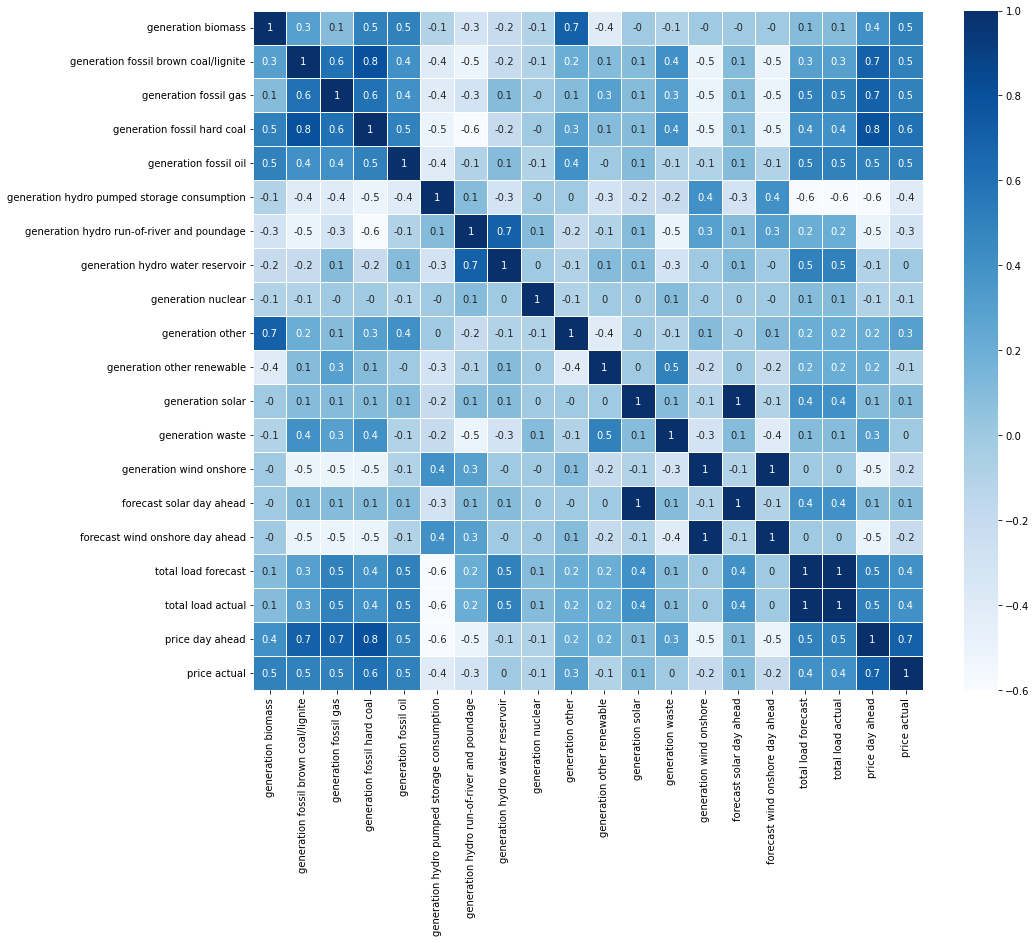

In [181]:
plt.figure(figsize=(15,12.5))
sns.heatmap(round(heat_map_features.corr(),1),annot=True,cmap='Blues',linewidth=0.9)
plt.show();

In [ ]:
# Leta see hist plot to see rangewise distribution

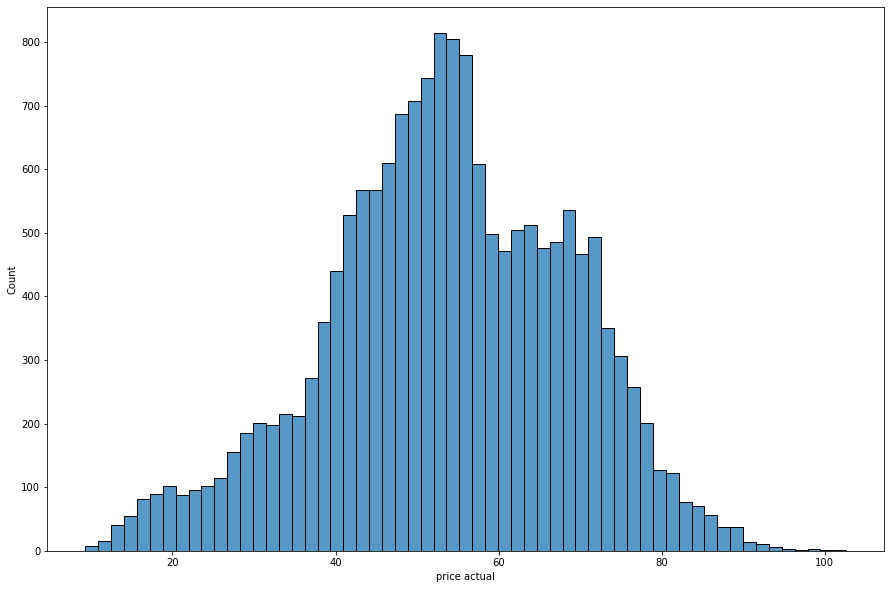

In [182]:
plt.figure(figsize=(15,10))
sns.histplot(df,x='price actual');
plt.show()

In [ ]:
# Visualize through scatter plot to see data points and multicolenearity

<AxesSubplot:xlabel='total load actual', ylabel='price actual'>

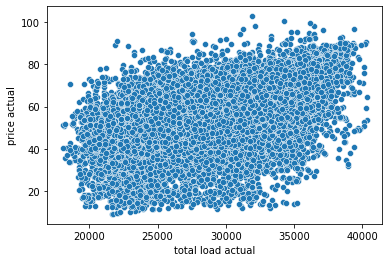

In [183]:
sns.scatterplot(x = 'total load actual',y ='price actual',data = df)

In [ ]:
# So the above EDA, shows that  output column is numerical, input columns shows linear relationship so we apply regression technique.

In [ ]:
# Create input and output

In [122]:
x = df.drop(columns=['price actual'])

In [123]:
y = df['price actual']

In [124]:
x

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead
0,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17,6436,26118,25385.0,50.10
1,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,16,5856,24934,24382.0,48.10
2,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,8,5454,23515,22734.0,47.33
3,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,2,5151,22642,21286.0,42.27
4,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,9,4861,21785,20264.0,38.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16564,338.0,609.0,3439.0,1450.0,182.0,3152.0,653.0,322.0,4952.0,54.0,74.0,24.0,281.0,13810.0,25,13793,21463,21697.0,10.88
16565,343.0,613.0,3451.0,1748.0,198.0,2500.0,663.0,320.0,5012.0,54.0,75.0,24.0,285.0,13656.0,16,13685,22266,22441.0,20.00
16566,355.0,736.0,3817.0,2548.0,226.0,1206.0,681.0,702.0,5018.0,54.0,81.0,24.0,290.0,13841.0,7,13742,25171,25567.0,35.00
16567,360.0,886.0,4268.0,3342.0,235.0,220.0,700.0,956.0,5018.0,55.0,90.0,31.0,296.0,14016.0,4,13960,29517,29818.0,46.40


In [125]:
y

0        65.41
1        64.92
2        64.48
3        59.32
4        56.04
         ...  
16564    20.32
16565    28.11
16566    43.18
16567    53.06
16568    57.51
Name: price actual, Length: 16527, dtype: float64

In [ ]:
# Split Data into Training and Testing Dataset

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# Lets Apply Linear Regression

In [128]:
from sklearn.linear_model import LinearRegression

In [129]:
lr  = LinearRegression()

In [130]:
lr.fit(x_train,y_train)

LinearRegression()

In [131]:
y_pred = lr.predict(x_test)

In [132]:
print('Traning Accuracy',lr.score(x_train,y_train)*100)
print('Testing Accuracy',lr.score(x_test,y_test)*100)

Traning Accuracy 61.80465791911046
Testing Accuracy 61.99454480439432


In [ ]:
# As Linear Regression gives lower accuracy so apply SVM-R on same.

In [133]:
from sklearn.svm import SVR

In [136]:
sr = SVR()

In [137]:
sr.fit(x_train,y_train)

SVR()

In [138]:
y_pred = sr.predict(x_test)

In [145]:
print('Traning Accuracy',sr.score(x_train,y_train)*100)
print('Testing Accuracy',sr.score(x_test,y_test)*100)

Traning Accuracy 41.261150370466105
Testing Accuracy 41.506474926000735


In [ ]:
# As Linear Regression and SVM both gives lower accuracy so apply Random Forest Regressor on same.

In [140]:
from sklearn.ensemble import RandomForestRegressor

In [141]:
rf = RandomForestRegressor()

In [142]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [143]:
y_pred = rf.predict(x_test)

In [146]:
print('Traning Accuracy',rf.score(x_train,y_train)*100)
print('Testing Accuracy',rf.score(x_test,y_test)*100)

Traning Accuracy 98.16269489913746
Testing Accuracy 88.40410192077898


In [ ]:
# Hyperparameter Tuning- As Random Forest Regressor gives highest accuracy so this is best sutable model for energy prediction on given dtaset.